In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier

ohe = OneHotEncoder()

In [2]:
data = pd.read_csv('GameData_cleaned_with_reviews.csv')
print(data)

       Unnamed: 0   appid                                          name  \
0               0  451450                       Hollywood Hills Mansion   
1               1  773620               Redemption: Tyranny of Daetorem   
2               2   37290                                      Zenerchi   
3               3  377340                          ChessBase 13 Academy   
4               4   40200                                     ItzaBitza   
...           ...     ...                                           ...   
41303       42293  567380                                    Heartbound   
41304       42294  599080                             The Blackout Club   
41305       42295  665180                                      Dark Elf   
41306       42296  387290  Ori and the Blind Forest: Definitive Edition   
41307       42297  791380                                       Way Out   

                                  developer  \
0                     LOOT Interactive, LLC   
1    

In [3]:
owner_cat = pd.DataFrame(data["owner_cat"])
# x = pd.DataFrame(data[['positive', 'negative', 'initialprice', 
#                        'total_lang', '18+', 'Indie', 'Free To Play', 
#                        'RPG', 'Strategy', 'Sports', 'Simulation', 
#                        'Racing', 'Massivley Multiplayer', 'Act_Adv', 'review']])

predictors = pd.DataFrame(data[['positive', 'negative', 'initialprice', 
                             'total_lang', '18+', 'Indie', 'Free To Play', 
                             'RPG', 'Strategy', 'Sports', 'Simulation', 
                             'Racing', 'Massivley Multiplayer', 'Act_Adv', 'review']])
ohe.fit(owner_cat)
owner_cat_ohe = pd.DataFrame(ohe.transform(owner_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(owner_cat.columns))

predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41308 entries, 0 to 41307
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   positive               41308 non-null  int64  
 1   negative               41308 non-null  int64  
 2   initialprice           41308 non-null  float64
 3   total_lang             41308 non-null  int64  
 4   18+                    41308 non-null  int64  
 5   Indie                  41308 non-null  int64  
 6   Free To Play           41308 non-null  int64  
 7   RPG                    41308 non-null  int64  
 8   Strategy               41308 non-null  int64  
 9   Sports                 41308 non-null  int64  
 10  Simulation             41308 non-null  int64  
 11  Racing                 41308 non-null  int64  
 12  Massivley Multiplayer  41308 non-null  int64  
 13  Act_Adv                41308 non-null  int64  
 14  review                 41308 non-null  int64  
dtypes:

In [4]:
# Check the encoded variables
owner_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41308 entries, 0 to 41307
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   owner_cat_0   41308 non-null  float64
 1   owner_cat_1   41308 non-null  float64
 2   owner_cat_2   41308 non-null  float64
 3   owner_cat_3   41308 non-null  float64
 4   owner_cat_4   41308 non-null  float64
 5   owner_cat_5   41308 non-null  float64
 6   owner_cat_6   41308 non-null  float64
 7   owner_cat_7   41308 non-null  float64
 8   owner_cat_8   41308 non-null  float64
 9   owner_cat_9   41308 non-null  float64
 10  owner_cat_10  41308 non-null  float64
 11  owner_cat_12  41308 non-null  float64
 12  owner_cat_13  41308 non-null  float64
dtypes: float64(13)
memory usage: 4.1 MB


In [5]:
data_ohe = pd.concat([predictors, owner_cat_ohe], 
                           sort = False, axis = 1).reindex(index=predictors.index)

# Check the final dataframe
data_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41308 entries, 0 to 41307
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   positive               41308 non-null  int64  
 1   negative               41308 non-null  int64  
 2   initialprice           41308 non-null  float64
 3   total_lang             41308 non-null  int64  
 4   18+                    41308 non-null  int64  
 5   Indie                  41308 non-null  int64  
 6   Free To Play           41308 non-null  int64  
 7   RPG                    41308 non-null  int64  
 8   Strategy               41308 non-null  int64  
 9   Sports                 41308 non-null  int64  
 10  Simulation             41308 non-null  int64  
 11  Racing                 41308 non-null  int64  
 12  Massivley Multiplayer  41308 non-null  int64  
 13  Act_Adv                41308 non-null  int64  
 14  review                 41308 non-null  int64  
 15  ow

[Text(0.5, 0.9, 'negative <= 28.5\ngini = 0.078\nsamples = 28915\nvalue = [[9120, 19795]\n[27724, 1191]\n[25207, 3708]\n[27061, 1854]\n[28386, 529]\n[27631, 1284]\n[28627, 288]\n[28866, 49]\n[28727, 188]\n[28908, 7]\n[28896, 19]\n[28913, 2]\n[28914, 1]]'),
 Text(0.25, 0.7, 'positive <= 48.5\ngini = 0.031\nsamples = 20668\nvalue = [[2319, 18349]\n[20636, 32]\n[18818, 1850]\n[20320, 348]\n[20663, 5]\n[20588, 80]\n[20664, 4]\n[20668, 0]\n[20668, 0]\n[20668, 0]\n[20668, 0]\n[20668, 0]\n[20668, 0]]'),
 Text(0.125, 0.5, 'negative <= 9.5\ngini = 0.022\nsamples = 17713\nvalue = [[1345, 16368]\n[17684, 29]\n[16639, 1074]\n[17527, 186]\n[17711, 2]\n[17662, 51]\n[17710, 3]\n[17713, 0]\n[17713, 0]\n[17713, 0]\n[17713, 0]\n[17713, 0]\n[17713, 0]]'),
 Text(0.0625, 0.3, 'initialprice <= 1.8\ngini = 0.017\nsamples = 14753\nvalue = [[865, 13888]\n[14734, 19]\n[14082, 671]\n[14622, 131]\n[14751, 2]\n[14713, 40]\n[14751, 2]\n[14753, 0]\n[14753, 0]\n[14753, 0]\n[14753, 0]\n[14753, 0]\n[14753, 0]]'),
 Text

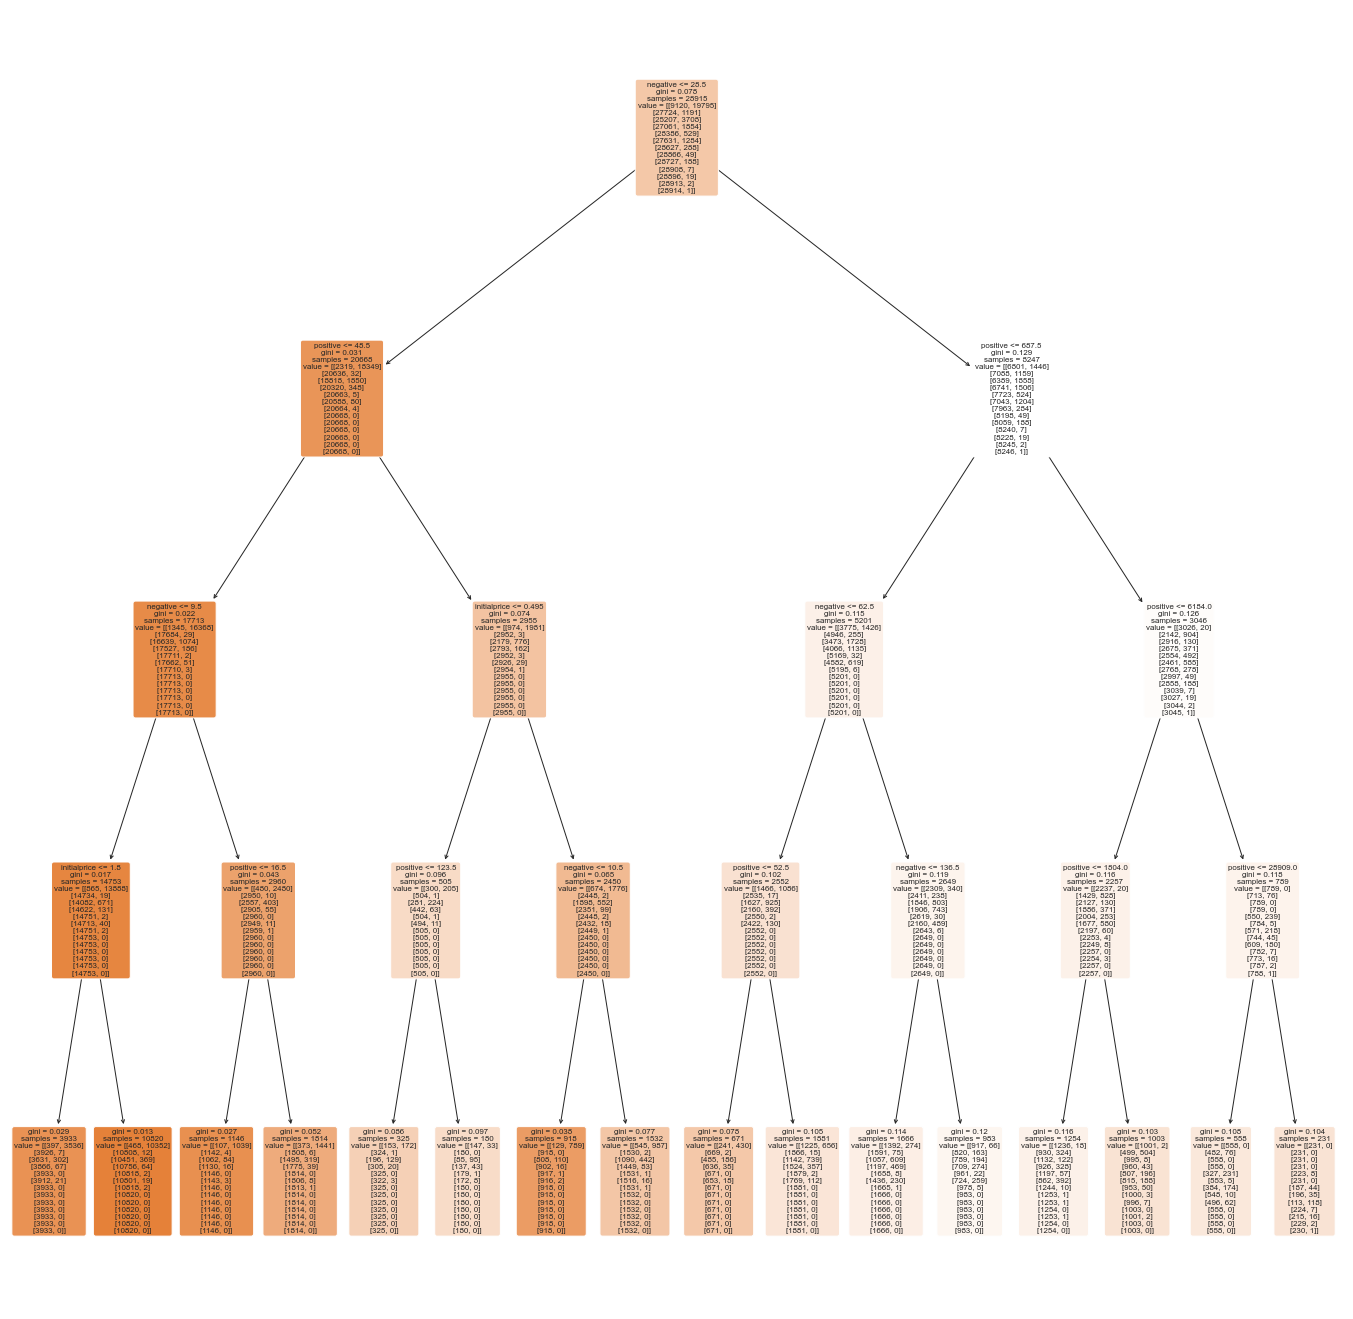

In [6]:
y = pd.DataFrame(data_ohe[['owner_cat_0', 'owner_cat_1', 'owner_cat_2', 'owner_cat_3', 'owner_cat_4', 'owner_cat_5', 'owner_cat_6', 'owner_cat_7', 'owner_cat_8', 'owner_cat_9', 'owner_cat_10', 'owner_cat_12', 'owner_cat_13']])
x = pd.DataFrame(data_ohe.drop(['owner_cat_0', 'owner_cat_1', 'owner_cat_2', 'owner_cat_3', 'owner_cat_4', 'owner_cat_5', 'owner_cat_6', 'owner_cat_7', 'owner_cat_8', 'owner_cat_9', 'owner_cat_10', 'owner_cat_12', 'owner_cat_13'], axis = 1))

# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # change max_depth to experiment
dectree.fit(x_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=x_train.columns, 
          class_names=['owner_cat_0', 'owner_cat_1', 'owner_cat_2', 'owner_cat_3', 'owner_cat_4', 'owner_cat_5', 'owner_cat_6', 'owner_cat_7', 'owner_cat_8', 'owner_cat_9', 'owner_cat_10', 'owner_cat_12', 'owner_cat_13'])

Train Data
Accuracy  :	 0.6731108421234653

TPR Train :	 0.42317380352644834
TNR Train :	 0.9998987956684546

FPR Train :	 0.00010120433154539014
FNR Train :	 0.5768261964735516


<AxesSubplot:>

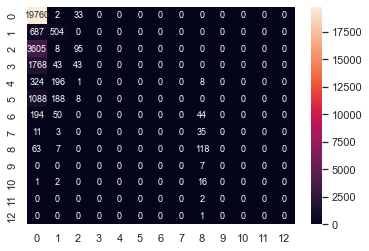

In [7]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(x_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(x_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
# confusion_matrix(y_test.values.argmax(axis=1), predictions.argmax(axis=1))
cmTrain = confusion_matrix(y_train.values.argmax(axis=1), y_train_pred.argmax(axis=1))
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train.values.argmax(axis=1), y_train_pred.argmax(axis=1)), 
           annot = True, fmt=".0f", annot_kws={"size": 9})

Test Data
Accuracy  :	 0.6698136044541273

TPR Test :	 0.417910447761194
TNR Test :	 1.0

FPR Test :	 0.0
FNR Test :	 0.582089552238806


<AxesSubplot:>

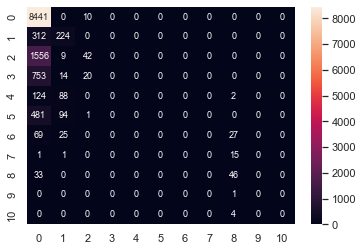

In [8]:
# Import the required metric from sklearn

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(x_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(x_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test.values.argmax(axis=1), y_test_pred.argmax(axis=1))
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test.values.argmax(axis=1), y_test_pred.argmax(axis=1)),  
           annot = True, fmt=".0f", annot_kws={"size": 9})

In [9]:
# Upsample Bad to match Good

owner_cat_0_bad = data_ohe[data_ohe.owner_cat_0 == 0]
owner_cat_0_good = data_ohe[data_ohe.owner_cat_0 == 1]

# Upsample the Bad samples
owner_cat_0_bad_up = resample(owner_cat_0_bad, 
                        replace=True,                     # sample with replacement
                        n_samples=owner_cat_0_good.shape[0])    # to match number of Good
 
# Combine the two classes back after upsampling
data_ohe_up_0 = pd.concat([owner_cat_0_good, owner_cat_0_bad_up])
 
# Check the ratio of the classes
data_ohe_up_0['owner_cat_0'].value_counts()

1.0    28246
0.0    28246
Name: owner_cat_0, dtype: int64

In [10]:
# Upsample Bad to match Good

owner_cat_1_bad = data_ohe[data_ohe.owner_cat_1 == 0]
owner_cat_1_good = data_ohe[data_ohe.owner_cat_1 == 1]
 
# Upsample the Bad samples
owner_cat_1_bad_up = resample(owner_cat_1_bad, 
                        replace=True,                     # sample with replacement
                        n_samples=owner_cat_1_good.shape[0])    # to match number of Good
 
# Combine the two classes back after upsampling
data_ohe_up_1 = pd.concat([owner_cat_1_good, owner_cat_1_bad_up])
 
# Check the ratio of the classes
data_ohe_up_1['owner_cat_1'].value_counts()

1.0    1727
0.0    1727
Name: owner_cat_1, dtype: int64

In [11]:
# Upsample Bad to match Good

owner_cat_2_bad = data_ohe[data_ohe.owner_cat_2 == 0]
owner_cat_2_good = data_ohe[data_ohe.owner_cat_2 == 1]
 
# Upsample the Bad samples
owner_cat_2_bad_up = resample(owner_cat_2_bad, 
                        replace=True,                     # sample with replacement
                        n_samples=owner_cat_2_good.shape[0])    # to match number of Good
 
# Combine the two classes back after upsampling
data_ohe_up_2 = pd.concat([owner_cat_2_good, owner_cat_2_bad_up])
 
# Check the ratio of the classes
data_ohe_up_2['owner_cat_2'].value_counts()

1.0    5315
0.0    5315
Name: owner_cat_2, dtype: int64

In [12]:
# Upsample Bad to match Good

owner_cat_3_bad = data_ohe[data_ohe.owner_cat_3 == 0]
owner_cat_3_good = data_ohe[data_ohe.owner_cat_3 == 1]
 
# Upsample the Bad samples
owner_cat_3_bad_up = resample(owner_cat_3_bad, 
                        replace=True,                     # sample with replacement
                        n_samples=owner_cat_3_good.shape[0])    # to match number of Good
 
# Combine the two classes back after upsampling
data_ohe_up_3 = pd.concat([owner_cat_3_good, owner_cat_3_bad_up])
 
# Check the ratio of the classes
data_ohe_up_3['owner_cat_3'].value_counts()

1.0    2641
0.0    2641
Name: owner_cat_3, dtype: int64

In [13]:
# Upsample Bad to match Good

owner_cat_4_bad = data_ohe[data_ohe.owner_cat_4 == 0]
owner_cat_4_good = data_ohe[data_ohe.owner_cat_4 == 1]
 
# Upsample the Bad samples
owner_cat_4_bad_up = resample(owner_cat_4_bad, 
                        replace=True,                     # sample with replacement
                        n_samples=owner_cat_4_good.shape[0])    # to match number of Good
 
# Combine the two classes back after upsampling
data_ohe_up_4 = pd.concat([owner_cat_4_good, owner_cat_4_bad_up])
 
# Check the ratio of the classes
data_ohe_up_4['owner_cat_4'].value_counts()

1.0    743
0.0    743
Name: owner_cat_4, dtype: int64

In [14]:
# Upsample Bad to match Good

owner_cat_5_bad = data_ohe[data_ohe.owner_cat_5 == 0]
owner_cat_5_good = data_ohe[data_ohe.owner_cat_5 == 1]
 
# Upsample the Bad samples
owner_cat_5_bad_up = resample(owner_cat_5_bad, 
                        replace=True,                     # sample with replacement
                        n_samples=owner_cat_5_good.shape[0])    # to match number of Good
 
# Combine the two classes back after upsampling
data_ohe_up_5 = pd.concat([owner_cat_5_good, owner_cat_5_bad_up])
 
# Check the ratio of the classes
data_ohe_up_5['owner_cat_5'].value_counts()

1.0    1860
0.0    1860
Name: owner_cat_5, dtype: int64

In [15]:
# Upsample Bad to match Good

owner_cat_6_bad = data_ohe[data_ohe.owner_cat_6 == 0]
owner_cat_6_good = data_ohe[data_ohe.owner_cat_6 == 1]
 
# Upsample the Bad samples
owner_cat_6_bad_up = resample(owner_cat_6_bad, 
                        replace=True,                     # sample with replacement
                        n_samples=owner_cat_6_good.shape[0])    # to match number of Good
 
# Combine the two classes back after upsampling
data_ohe_up_6 = pd.concat([owner_cat_6_good, owner_cat_6_bad_up])
 
# Check the ratio of the classes
data_ohe_up_6['owner_cat_6'].value_counts()

1.0    409
0.0    409
Name: owner_cat_6, dtype: int64

In [16]:
# Upsample Bad to match Good

owner_cat_7_bad = data_ohe[data_ohe.owner_cat_7 == 0]
owner_cat_7_good = data_ohe[data_ohe.owner_cat_7 == 1]
 
# Upsample the Bad samples
owner_cat_7_bad_up = resample(owner_cat_7_bad, 
                        replace=True,                     # sample with replacement
                        n_samples=owner_cat_7_good.shape[0])    # to match number of Good
 
# Combine the two classes back after upsampling
data_ohe_up_7 = pd.concat([owner_cat_7_good, owner_cat_7_bad_up])
 
# Check the ratio of the classes
data_ohe_up_7['owner_cat_7'].value_counts()

1.0    66
0.0    66
Name: owner_cat_7, dtype: int64

In [17]:
# Upsample Bad to match Good

owner_cat_7_bad = data_ohe[data_ohe.owner_cat_7 == 0]
owner_cat_7_good = data_ohe[data_ohe.owner_cat_7 == 1]
 
# Upsample the Bad samples
owner_cat_7_bad_up = resample(owner_cat_7_bad, 
                        replace=True,                     # sample with replacement
                        n_samples=owner_cat_7_good.shape[0])    # to match number of Good
 
# Combine the two classes back after upsampling
data_ohe_up_7 = pd.concat([owner_cat_7_good, owner_cat_7_bad_up])
 
# Check the ratio of the classes
data_ohe_up_7['owner_cat_7'].value_counts()

1.0    66
0.0    66
Name: owner_cat_7, dtype: int64

In [18]:
# Upsample Bad to match Good

owner_cat_8_bad = data_ohe[data_ohe.owner_cat_8 == 0]
owner_cat_8_good = data_ohe[data_ohe.owner_cat_8 == 1]
 
# Upsample the Bad samples
owner_cat_8_bad_up = resample(owner_cat_8_bad, 
                        replace=True,                     # sample with replacement
                        n_samples=owner_cat_8_good.shape[0])    # to match number of Good
 
# Combine the two classes back after upsampling
data_ohe_up_8 = pd.concat([owner_cat_8_good, owner_cat_8_bad_up])
 
# Check the ratio of the classes
data_ohe_up_8['owner_cat_8'].value_counts()

1.0    267
0.0    267
Name: owner_cat_8, dtype: int64

In [19]:
# Upsample Bad to match Good

owner_cat_9_bad = data_ohe[data_ohe.owner_cat_9 == 0]
owner_cat_9_good = data_ohe[data_ohe.owner_cat_9 == 1]
 
# Upsample the Bad samples
owner_cat_9_bad_up = resample(owner_cat_9_bad, 
                        replace=True,                     # sample with replacement
                        n_samples=owner_cat_9_good.shape[0])    # to match number of Good
 
# Combine the two classes back after upsampling
data_ohe_up_9 = pd.concat([owner_cat_9_good, owner_cat_9_bad_up])
 
# Check the ratio of the classes
data_ohe_up_9['owner_cat_9'].value_counts()

1.0    8
0.0    8
Name: owner_cat_9, dtype: int64

In [20]:
# Upsample Bad to match Good

owner_cat_10_bad = data_ohe[data_ohe.owner_cat_10 == 0]
owner_cat_10_good = data_ohe[data_ohe.owner_cat_10 == 1]
 
# Upsample the Bad samples
owner_cat_10_bad_up = resample(owner_cat_10_bad, 
                        replace=True,                     # sample with replacement
                        n_samples=owner_cat_10_good.shape[0])    # to match number of Good
 
# Combine the two classes back after upsampling
data_ohe_up_10 = pd.concat([owner_cat_10_good, owner_cat_10_bad_up])
 
# Check the ratio of the classes
data_ohe_up_10['owner_cat_10'].value_counts()

1.0    23
0.0    23
Name: owner_cat_10, dtype: int64

In [21]:
# Upsample Bad to match Good

owner_cat_12_bad = data_ohe[data_ohe.owner_cat_12 == 0]
owner_cat_12_good = data_ohe[data_ohe.owner_cat_12 == 1]
 
# Upsample the Bad samples
owner_cat_12_bad_up = resample(owner_cat_12_bad, 
                        replace=True,                     # sample with replacement
                        n_samples=owner_cat_12_good.shape[0])    # to match number of Good
 
# Combine the two classes back after upsampling
data_ohe_up_12 = pd.concat([owner_cat_12_good, owner_cat_12_bad_up])
 
# Check the ratio of the classes
data_ohe_up_12['owner_cat_12'].value_counts()

1.0    2
0.0    2
Name: owner_cat_12, dtype: int64

In [22]:
# Upsample Bad to match Good

owner_cat_13_bad = data_ohe[data_ohe.owner_cat_13 == 0]
owner_cat_13_good = data_ohe[data_ohe.owner_cat_13 == 1]
 
# Upsample the Bad samples
owner_cat_13_bad_up = resample(owner_cat_13_bad, 
                        replace=True,                     # sample with replacement
                        n_samples=owner_cat_13_good.shape[0])    # to match number of Good
 
# Combine the two classes back after upsampling
data_ohe_up_13 = pd.concat([owner_cat_13_good, owner_cat_13_bad_up])
 
# Check the ratio of the classes
data_ohe_up_13['owner_cat_13'].value_counts()

1.0    1
0.0    1
Name: owner_cat_13, dtype: int64

In [23]:
data_ohe_up = pd.concat([data_ohe_up_0, data_ohe_up_1, data_ohe_up_2, 
                         data_ohe_up_3, data_ohe_up_4, data_ohe_up_5, data_ohe_up_6,
                         data_ohe_up_7, data_ohe_up_8, data_ohe_up_9, data_ohe_up_10, data_ohe_up_12, data_ohe_up_13])
print(data_ohe_up)

       positive  negative  initialprice  total_lang  18+  Indie  Free To Play  \
0             5         2           4.9           1    0      0             0   
1             5         0           0.0           2    0      0             0   
2            11         1           9.9           1    0      0             0   
3            13         1           0.0           1    0      0             0   
4             7         3           9.9           1    0      0             0   
...         ...       ...           ...         ...  ...    ...           ...   
2691    5540107    740889           0.0          26    0      0             0   
9630         22         9           6.9           1    0      1             0   
40242        19         0           1.9           2    0      1             0   
2689    1415893    279073           0.0          26    0      0             0   
13268         2         1           9.9           1    0      0             0   

       RPG  Strategy  Sport

[Text(0.5, 0.9, 'negative <= 22.5\ngini = 0.11\nsamples = 57831\nvalue = [[31280, 26551]\n[53612, 4219]\n[45332, 12499]\n[51460, 6371]\n[56049, 1782]\n[53331, 4500]\n[56824, 1007]\n[57674, 157]\n[57171, 660]\n[57814, 17]\n[57771, 60]\n[57825, 6]\n[57829, 2]]'),
 Text(0.25, 0.7, 'positive <= 30.5\ngini = 0.054\nsamples = 30345\nvalue = [[6536, 23809]\n[30255, 90]\n[25174, 5171]\n[29350, 995]\n[30320, 25]\n[30097, 248]\n[30338, 7]\n[30345, 0]\n[30345, 0]\n[30345, 0]\n[30345, 0]\n[30345, 0]\n[30345, 0]]'),
 Text(0.125, 0.5, 'initialprice <= 0.94\ngini = 0.039\nsamples = 23255\nvalue = [[3335, 19920]\n[23182, 73]\n[20631, 2624]\n[22770, 485]\n[23241, 14]\n[23119, 136]\n[23252, 3]\n[23255, 0]\n[23255, 0]\n[23255, 0]\n[23255, 0]\n[23255, 0]\n[23255, 0]]'),
 Text(0.0625, 0.3, 'positive <= 9.5\ngini = 0.065\nsamples = 3512\nvalue = [[948, 2564]\n[3501, 11]\n[2800, 712]\n[3342, 170]\n[3504, 8]\n[3465, 47]\n[3512, 0]\n[3512, 0]\n[3512, 0]\n[3512, 0]\n[3512, 0]\n[3512, 0]\n[3512, 0]]'),
 Text(0.0

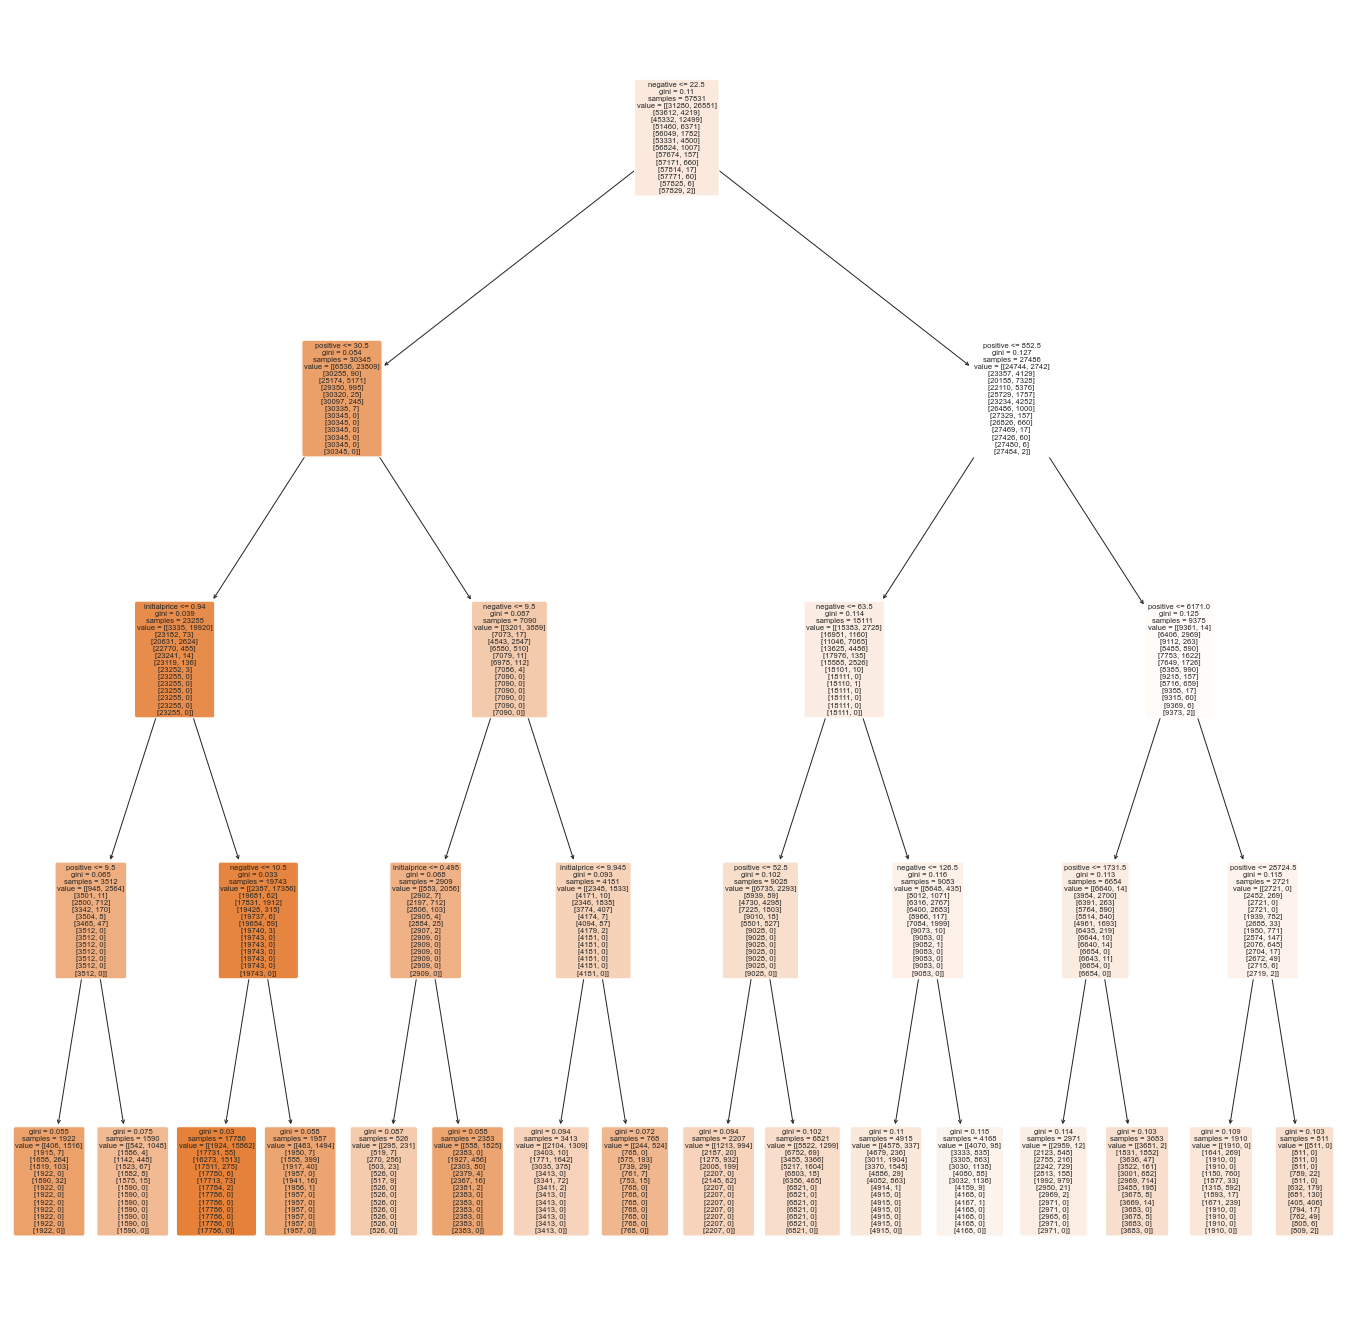

In [24]:
y = pd.DataFrame(data_ohe_up[['owner_cat_0', 'owner_cat_1', 'owner_cat_2', 'owner_cat_3', 'owner_cat_4', 'owner_cat_5', 'owner_cat_6', 'owner_cat_7', 'owner_cat_8', 'owner_cat_9', 'owner_cat_10', 'owner_cat_12', 'owner_cat_13']])
x = pd.DataFrame(data_ohe_up.drop(['owner_cat_0', 'owner_cat_1', 'owner_cat_2', 'owner_cat_3', 'owner_cat_4', 'owner_cat_5', 'owner_cat_6', 'owner_cat_7', 'owner_cat_8', 'owner_cat_9', 'owner_cat_10', 'owner_cat_12', 'owner_cat_13'], axis = 1))

# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # change max_depth to experiment
dectree.fit(x_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=x_train.columns, 
          class_names=['owner_cat_0', 'owner_cat_1', 'owner_cat_2', 'owner_cat_3', 'owner_cat_4', 'owner_cat_5', 'owner_cat_6', 'owner_cat_7', 'owner_cat_8', 'owner_cat_9', 'owner_cat_10', 'owner_cat_12', 'owner_cat_13'])

Train Data
Accuracy  :	 0.424115093980737

TPR Train :	 0.43896657975823655
TNR Train :	 0.99992467327031

FPR Train :	 7.53267296900305e-05
FNR Train :	 0.5610334202417635


<AxesSubplot:>

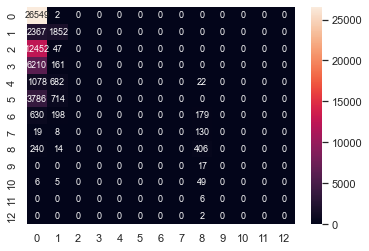

In [25]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(x_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(x_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
# confusion_matrix(y_test.values.argmax(axis=1), predictions.argmax(axis=1))
cmTrain = confusion_matrix(y_train.values.argmax(axis=1), y_train_pred.argmax(axis=1))
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train.values.argmax(axis=1), y_train_pred.argmax(axis=1)), 
           annot = True, fmt=".0f", annot_kws={"size": 9})

Test Data
Accuracy  :	 0.42202945329836594

TPR Test :	 0.4327683615819209
TNR Test :	 1.0

FPR Test :	 0.0
FNR Test :	 0.5672316384180791


<AxesSubplot:>

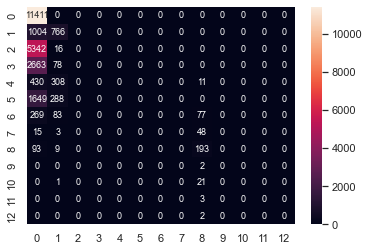

In [26]:
# Import the required metric from sklearn

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(x_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(x_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test.values.argmax(axis=1), y_test_pred.argmax(axis=1))
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test.values.argmax(axis=1), y_test_pred.argmax(axis=1)),  
           annot = True, fmt=".0f", annot_kws={"size": 9})

In [27]:
# Import essential models and functions from sklearn

# Extract Response and Predictors
y = pd.DataFrame(data_ohe_up[['owner_cat_0', 'owner_cat_1', 'owner_cat_2', 'owner_cat_3', 'owner_cat_4', 'owner_cat_5', 'owner_cat_6', 'owner_cat_7', 'owner_cat_8', 'owner_cat_9', 'owner_cat_10', 'owner_cat_12', 'owner_cat_13']])
x = pd.DataFrame(data_ohe_up.drop(['owner_cat_0', 'owner_cat_1', 'owner_cat_2', 'owner_cat_3', 'owner_cat_4', 'owner_cat_5', 'owner_cat_6', 'owner_cat_7', 'owner_cat_8', 'owner_cat_9', 'owner_cat_10', 'owner_cat_12', 'owner_cat_13'], axis = 1))

# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

rforest = RandomForestClassifier(n_estimators = 1000,  # n_estimators denote number of trees
                                 max_depth = 10)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(x_train, y_train.values.argmax(axis=1))

RandomForestClassifier(max_depth=10, n_estimators=1000)

Train Data
Accuracy  :	 0.7304154159000678

TPR Train :	 0.9711945778028805
TNR Train :	 0.9997331300038125

FPR Train :	 0.0002668699961875715
FNR Train :	 0.028805422197119457


<AxesSubplot:>

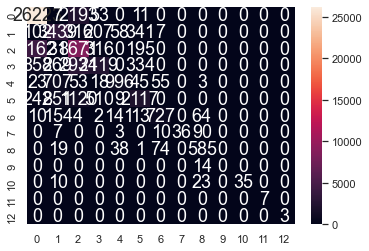

In [28]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(x_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(x_train, y_train.values.argmax(axis=1)))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train.values.argmax(axis=1), y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train.values.argmax(axis=1), y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.7117749588457442

TPR Test :	 0.9746192893401016
TNR Test :	 1.0

FPR Test :	 0.0
FNR Test :	 0.025380710659898477


<AxesSubplot:>

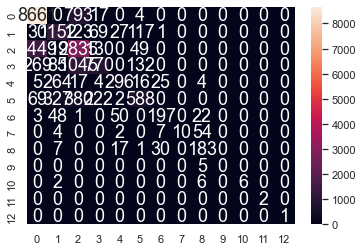

In [29]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(x_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(x_test, y_test.values.argmax(axis=1)))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test.values.argmax(axis=1), y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test.values.argmax(axis=1), y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [30]:
owner_cat = pd.DataFrame(data["owner_cat"])
# x = pd.DataFrame(data[['positive', 'negative', 'initialprice', 
#                        'total_lang', '18+', 'Indie', 'Free To Play', 
#                        'RPG', 'Strategy', 'Sports', 'Simulation', 
#                        'Racing', 'Massivley Multiplayer', 'Act_Adv', 'review']])

predictors = pd.DataFrame(data[['positive', 'negative', 'initialprice', 
                             'total_lang', '18+', 'Indie', 'Free To Play', 
                             'RPG', 'Strategy', 'Sports', 'Simulation', 
                             'Racing', 'Massivley Multiplayer', 'Act_Adv', 'review']])

In [31]:
# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(predictors, owner_cat, test_size = 0.25)

rforest = RandomForestClassifier(n_estimators = 1000,  # n_estimators denote number of trees
                                 max_depth = 10)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(x_train, y_train.values.argmax(axis=1))

RandomForestClassifier(max_depth=10, n_estimators=1000)

Train Data
Accuracy  :	 0.6838384816500436

TPR Train :	 0.0
TNR Train :	 1.0

FPR Train :	 0.0
FNR Train :	 1.0


<AxesSubplot:>

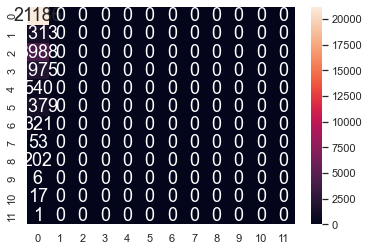

In [32]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(x_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(x_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.6836448145637649

TPR Test :	 0.0
TNR Test :	 1.0

FPR Test :	 0.0
FNR Test :	 1.0


<AxesSubplot:>

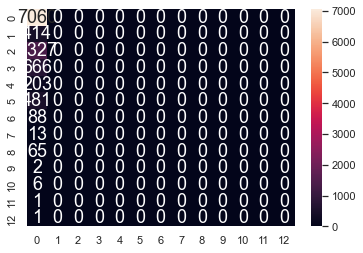

In [33]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(x_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(x_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [34]:
['owner_cat_0', 'owner_cat_1', 'owner_cat_2', 'owner_cat_3', 'owner_cat_4', 'owner_cat_5', 'owner_cat_6', 
'owner_cat_7', 'owner_cat_8', 'owner_cat_9', 'owner_cat_10', 'owner_cat_12', 'owner_cat_13']

['owner_cat_0',
 'owner_cat_1',
 'owner_cat_2',
 'owner_cat_3',
 'owner_cat_4',
 'owner_cat_5',
 'owner_cat_6',
 'owner_cat_7',
 'owner_cat_8',
 'owner_cat_9',
 'owner_cat_10',
 'owner_cat_12',
 'owner_cat_13']